## Netowk program

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
m0 = 5 # seed
m = 1  # number of link each node must have
N = 10 # network size

In [3]:
# list of all the nodes
node_list = np.arange(0, m0, 1)

In [4]:
node_list

array([0, 1, 2, 3, 4])

In [5]:
def print_connections(network_map_A, network_map_B):
    if len(network_map_A) != len(network_map_B):
        print("different sizes")
        pass
    for i in range(len(network_map_A)):
        if network_map_A[i] == network_map_B[i]:
            print("self connection")
        print(network_map_A[i], " : ", network_map_B[i])
        pass
    

In [6]:
degree_count = [0] * N # how many connection each node have

In [7]:
number_of_links = 0
for i in range(m0):
    number_of_links += i

number_of_links += (N-m0)*m;

In [8]:
# the i-th element of network_map_A is connected with the i-th element of network_map_B
network_map_A = [0] * number_of_links
network_map_B = [0] * number_of_links

In [9]:
preferentially = [] # very useful in preferential attachment or BA network

### seeding the network

In [10]:
c = 0
for i in range(m0):
    for j in range(m0):
        if j>i:
            network_map_A[c] = i
            network_map_B[c] = j
            preferentially.append(i)
            preferentially.append(j)
            degree_count[i] += 1
            degree_count[j] += 1
            c += 1
            pass
        pass
    pass
print(c)

10


In [11]:
print_connections(network_map_A, network_map_B)

0  :  1
0  :  2
0  :  3
0  :  4
1  :  2
1  :  3
1  :  4
2  :  3
2  :  4
3  :  4
self connection
0  :  0
self connection
0  :  0
self connection
0  :  0
self connection
0  :  0
self connection
0  :  0


### constructing remaining network

In [12]:
# version 1 : chances of repetition when m is large
to_be_added_to_preferentially = []
for i in range(m0, N):
    for k in range(m): # each node comes with two new link
        rnd = random.randint(0, len(preferentially)-1)
        j = preferentially[rnd]
        network_map_A[c] = i
        network_map_B[c] = j
        
        # to prevent self connection, don't just add directly to preferentially.
        # store it in a temporary location first
        to_be_added_to_preferentially.append(i)
        to_be_added_to_preferentially.append(j)
        degree_count[i] += 1
        degree_count[j] += 1
        c += 1
        pass
    preferentially.extend(to_be_added_to_preferentially)
    to_be_added_to_preferentially = []
    pass


In [16]:
## version 2 : no chance of repetition

for i in range(m0, N):
    
    # first select m_nodes preferentially with no repetition 
    # to prevent self connection
    m_nodes = set()
    while len(m_nodes) < m: # since each new node comes with m new links
        rnd = random.randint(0, len(preferentially)-1)
        j = preferentially[rnd]
        m_nodes.add(j)
        pass
    # then connect the new node to the selected m_nodes
    for j in m_nodes:
        network_map_A[c] = i
        network_map_B[c] = j
        preferentially.append(i)
        preferentially.append(j)
        degree_count[i] += 1
        degree_count[j] += 1
        c += 1
        pass
    pass


In [17]:
print_connections(network_map_A, network_map_B)

0  :  1
0  :  2
0  :  3
0  :  4
1  :  2
1  :  3
1  :  4
2  :  3
2  :  4
3  :  4
5  :  0
6  :  5
7  :  0
8  :  4
9  :  2


#### degree distribution

In [14]:
# degree_count

In [15]:
uniques = np.unique(degree_count, return_counts=True)
a = uniques[0]
b = uniques[1]

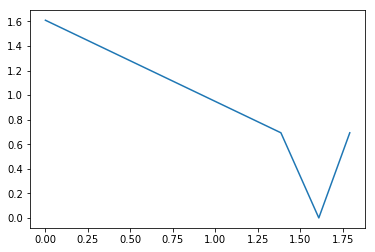

In [16]:
# plt.plot(a, b)
plt.plot(np.log(a), np.log(b))

# Percolation part

In [76]:
# we randomize this list and select values sequantially
list_of_link_indices = [i for i in range(number_of_links)]
random.shuffle(list_of_link_indices) # suffle the value of the list

In [18]:
# list_of_link_indices

### Root Finding Method

In [99]:
def findRoot(clusters, a):
    """
    finds root node starting from a
        clusters : cluster sizes and roots are here
        a        : the point where finding starts.
    """
#     print("inside findRoot")
    if clusters[a] < 0:
        return a
#     print("starting loop, a = ", a)
#     print(clusters)
    while not (clusters[a] < 0):
        b = clusters[a]
#         print(a, ", ", b)
#         print(clusters)
        a = b
        pass
#     print("loop finished")
#     print(clusters)
    return a
    

In [100]:
def findRoot_v2(clusters, a):
    """
    finds root node starting from a. Also replaces some values so that search from node a is faster next time
        clusters : cluster sizes and roots are here
        a        : the point where finding starts.
    """
    if clusters[a] < 0:
        return a
#     print("starting loop, a = ", a)
#     print(clusters)
    redirecting_indices = []
    while not (clusters[a] < 0):
        redirecting_indices.append(a)
        b = clusters[a]
#         print(a, ", ", b)
#         print(clusters)
        a = b
        pass
    # so that next time search is at least one step lesser
    for ri in redirecting_indices:
        clusters[ri] = a
#     print("loop finished")
#     print(clusters)
    return a

In [101]:
arr = [-1, 0, 1, 2, 0, 2]

In [102]:
findRoot(arr, 5)

0

In [103]:
# arr is unchanged
arr

[-1, 0, 1, 2, 0, 2]

In [104]:
findRoot_v2(arr, 5)

0

In [105]:
# arr is updated to that next time search is faster
arr

[-1, 0, 0, 2, 0, 0]

 if the value and indeces of an array is same then that is an error. And root can never be found.
 
 for example, $i$-th index of an array is $i$

### Cluster Merging

In [134]:
def mergeClusters(clusters, root_a, root_b):
#     print("both are roots, ", root_a, ", ", root_b)
    if root_a == root_b:
        return
    # join two roots
#     print("before merging ")
#     print(clusters)
    clusters[root_a] = clusters[root_a] + clusters[root_b] # sizes must add up
    clusters[root_b] = root_a # now clusters[b] points to a
#     print("after merging ")
#     print(clusters)

In [135]:
def clusterCount(clusters):
    """
    number of negative values in clusters is the number of cluster
    """
    sm = 0
    for i in clusters:
        if i < 0:
            sm += 1
            pass
        pass
    return sm

In [136]:
def clusterSizeSum(clusters):
    sm = 0
    for i in clusters:
        if i < 0:
            sm += i
            pass
        pass
    return sm * -1

In [137]:
def clusterSize(clusters, a):
    root = findRoot(clusters, a)
    return clusters[root] * -1

In [138]:
# clusters hold the information about the clusters in the network
# initially all the nodes are cluster of size 1
# positive value of the clusters[k] is the index of the root node
# negative value of the clusters[k] is the cluster size
clusters = [-1 for i in range(N)]


In [139]:

for i in list_of_link_indices:
    # selecting sequentially from suffled list_of_link_indices is like selecting randomly
#     print(i)
#     print("number of remaining clusters", clusterCount(clusters))
    a = network_map_A[i]
    b = network_map_B[i]
#     print(a, " and ", b)
#     print(clusters)
    # node a and b will be connected together
    root_a = findRoot(clusters, a)
    root_b = findRoot(clusters, b)
    mergeClusters(clusters, root_a, root_b)
    # make both cluster point to root cluster. so that search can be faster later
#     print(clusters)

In [140]:
clusters

[1, 8, 8, 9, 3, 0, 7, -10, 7, 5]

In [141]:
clusterCount(clusters)

1

In [142]:
clusterSizeSum(clusters)

10

In [125]:
for i in clusters:
    print(clusterSize(clusters, i))

10
10
10
10
10
10
10
10
10
10
